In [48]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In [49]:
data = pd.read_csv("preprocessing.csv", index_col=0)
data.head(10)

,Age,EdLevel,YearsExp,YearsProExp,PreviousSalary,NumSkills,Employed,YearsExpComb
0,1,4,2.079442,1.609438,51552,4,0,3.688879
1,1,3,2.564949,1.791759,46482,12,1,4.356709
2,1,4,2.772589,1.945910,77290,7,0,4.718499
3,1,3,2.302585,1.945910,46135,13,0,4.248495
4,0,5,3.713572,3.433987,160932,2,0,7.147559
5,1,4,2.302585,1.098612,38915,5,0,3.401197
6,0,4,3.295837,2.944439,77831,17,1,6.240276
7,1,4,2.708050,1.791759,81319,4,0,4.499810
8,0,3,3.688879,3.091042,68507,3,0,6.779922
9,0,4,3.044522,2.833213,37752,6,0,5.877736


In [50]:
# df_x = data[["Age", "EdLevel", "YearsExp", "YearsProExp", "NumSkills"]]
df_x = data[["Age", "EdLevel", "YearsExpComb", "NumSkills"]]
#df_x['sum_exp']=df_x["YearsExp"]+df_x["YearsProExp"]
df_x.head(10)

,Age,EdLevel,YearsExpComb,NumSkills
0,1,4,3.688879,4
1,1,3,4.356709,12
2,1,4,4.718499,7
3,1,3,4.248495,13
4,0,5,7.147559,2
5,1,4,3.401197,5
6,0,4,6.240276,17
7,1,4,4.499810,4
8,0,3,6.779922,3
9,0,4,5.877736,6


In [51]:
df_y = data[["Employed"]]
df_y.head(10)

,Employed
0,0
1,1
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [52]:
x_train, x_valid, y_train, y_valid = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

print(f"Data before splitting: {len(df_x)}")
print(f"Train data: {len(x_train)}")
print(f"Validation data: {len(x_valid)}")

Data before splitting: 73462
Train data: 58769
Validation data: 14693


In [53]:
EPOCH = 20

In [54]:
len_feature = len(df_x.columns)
print(len_feature)

4


In [55]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])
# col_train=["Age", "EdLevel", "YearsExp", "YearsProExp", "NumSkills"]
# col_train=["Age", "EdLevel", "NumSkills", "sum_exp"]
history = model.fit(x_train, y_train, epochs=EPOCH, validation_data=(x_valid, y_valid), batch_size=128)

Epoch 1/20
460/460 [==============================] - 5s 7ms/step - loss: 0.6424 - accuracy: 0.7013 - val_loss: 0.5573 - val_accuracy: 0.7667
Epoch 2/20
460/460 [==============================] - 3s 6ms/step - loss: 0.5329 - accuracy: 0.7692 - val_loss: 0.5151 - val_accuracy: 0.7698
Epoch 3/20
460/460 [==============================] - 4s 8ms/step - loss: 0.5054 - accuracy: 0.7718 - val_loss: 0.4968 - val_accuracy: 0.7728
Epoch 4/20
460/460 [==============================] - 3s 7ms/step - loss: 0.4918 - accuracy: 0.7733 - val_loss: 0.4854 - val_accuracy: 0.7747
Epoch 5/20
460/460 [==============================] - 3s 6ms/step - loss: 0.4830 - accuracy: 0.7735 - val_loss: 0.4782 - val_accuracy: 0.7750
Epoch 6/20
460/460 [==============================] - 3s 7ms/step - loss: 0.4769 - accuracy: 0.7740 - val_loss: 0.4730 - val_accuracy: 0.7762
Epoch 7/20
460/460 [==============================] - 3s 6ms/step - loss: 0.4724 - accuracy: 0.7749 - val_loss: 0.4681 - val_accuracy: 0.7774
Epoch 

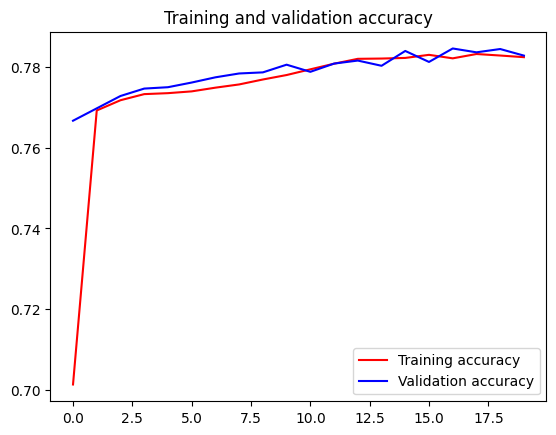

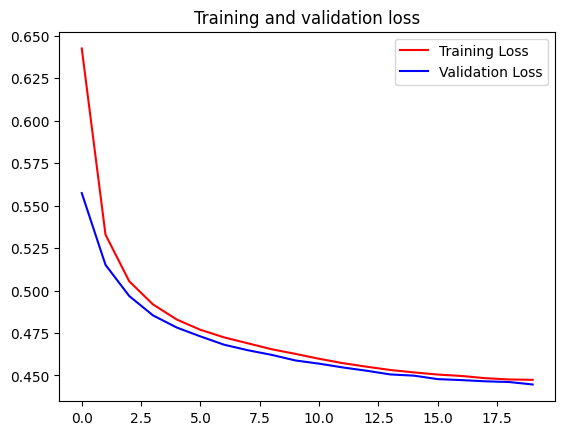

In [56]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [58]:
saved_model = "emp_model.h5"
model.save(saved_model)